In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
import matplotlib
import plotly.express as px
#from sklearn.datasets.samples_generator import make_blobs
#from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
from functools import reduce
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler,MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import GridSearchCV
#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding
#from sklearn.svm import LinearSVC
#from sklearn.metrics import confusion_matrix
#from sklearn import svm
#from sklearn.svm import SVC
# Some matplotlib options
#%matplotlib inline
sns.set_style("darkgrid")
#matplotlib.style.use("ggplot")

# General pandas options
#pd.set_option('display.max_colwidth', -1)  # Show the entire column 
pd.options.display.max_columns = 100 
#pd.options.display.max_rows = 500

In [5]:
pwd

'/content'

In [6]:
#Cargar el CSV
#ibm=pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

ibm = pd.read_csv('https://raw.githubusercontent.com/Alonem-HG/hr-analytics-employee-attrition/master/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [7]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#Dimension del dataframe.
ibm.shape

(1470, 35)

In [9]:
# Ver descripcion de los datos
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
ibm.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
ibm.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [12]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
#Exploramos los tipos de dato de cada columna
ibm.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
#Contar los NaN
ibm.isna().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
ibm.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [17]:
#quitar los espacios 
df_obj = ibm.select_dtypes(['object'])
#df_obj
ibm[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [18]:
# Checar duplicados
print(ibm[ibm.duplicated(keep=False)].shape)

(0, 35)


In [19]:
ibm['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [20]:
#Convertir Atrattion a Numeros. 
#Remplazar "No" = 0 y "Yes" = 1. 

ibm['Attrition_ind'] = 0 
ibm.loc[ibm['Attrition'] =='Yes', 'Attrition_ind'] = 1
ibm['Attrition_ind'].value_counts()

0    1233
1     237
Name: Attrition_ind, dtype: int64

# Exploratory data analysis

Text(0, 0.5, 'Numero de empleados')

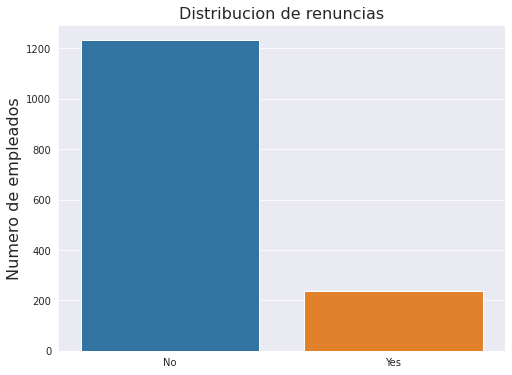

In [21]:
plt.figure(figsize=(8,6))
ren=ibm.Attrition.value_counts()
sns.barplot(x=ren.index ,y=ren.values)
plt.title('Distribucion de renuncias',fontsize=16)
#plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Numero de empleados', fontsize=16)

In [22]:
ibm.Attrition.value_counts() * 100 / len(ibm.Attrition)

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

  - We can clearly see that Dataset in Imbalanced(84% No , 16% Yes)

## Eliminar columnas 

In [23]:
#Remover datos que no necesitamos ya
ibm.drop(["EmployeeNumber"], axis = 1, inplace=True)
ibm.drop(["Attrition"], axis = 1, inplace=True)
ibm.drop(["Over18"], axis = 1, inplace=True)
ibm.drop(["EmployeeCount"], axis = 1, inplace=True)
ibm.drop(["HourlyRate","DailyRate", "MonthlyRate","StandardHours"], 1 ,inplace=True)

In [24]:
ibm.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_ind'],
      dtype='object')

## Separando datos categoricos y numericos

In [25]:
#categorical data 4.	Create an array of all the numeric datatypes. Similarly, create an array of all categorical datatypes
cat_cols = ['Attrition_ind',
            'BusinessTravel',
            'Department',
            'Education',
            'EducationField',
            'Gender',
            'JobLevel',
            'JobRole',
            'JobInvolvement',
            'JobSatisfaction',
            'RelationshipSatisfaction',
            'PerformanceRating',
            'StockOptionLevel',
            'MaritalStatus',
            'TrainingTimesLastYear',
            'WorkLifeBalance',
            'OverTime']

cat_cols

['Attrition_ind',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'JobInvolvement',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'PerformanceRating',
 'StockOptionLevel',
 'MaritalStatus',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'OverTime']

In [26]:
#Numerical data 4.	Create an array of all the numeric datatypes. Similarly, create an array of all categorical datatypes
num_cols=['Age',
          'DistanceFromHome',
          'TotalWorkingYears',
          'MonthlyIncome',
          'YearsAtCompany', 
          'YearsInCurrentRole', 
          'YearsSinceLastPromotion',  
          'YearsWithCurrManager']

num_cols

['Age',
 'DistanceFromHome',
 'TotalWorkingYears',
 'MonthlyIncome',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [27]:
ibm[num_cols] = ibm[num_cols].applymap(np.float64)
#ibm[num_cols] = ibm[num_cols].applymap(np.int64)

In [28]:
#Ver categoricos
for x in range(0,len(cat_cols)):
    print (ibm[cat_cols[x]].value_counts())

0    1233
1     237
Name: Attrition_ind, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
3   

In [29]:
ibm.dtypes

Age                         float64
BusinessTravel               object
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        float64
Attrition_ind               

# **¿ Cuales son los factores principales para la deserción de empleados ?**

<img src="https://github.com/Alonem-HG/hr-analytics-employee-attrition/blob/master/%5Cdata%5Cindice2.jpg?raw=1">

---

## Relacion de renuncias con Salario Mensual
                   
---

In [30]:
rate_att=ibm.groupby(['MonthlyIncome','Attrition_ind']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition_ind']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition_ind',
            labels={
                     "MonthlyIncome": "Salario Mensual en dolares",
                     "Counts": "N° de empleados",
                     "Attrition_ind": "Renuncias"
                 },
            title='Ingresos mensuales por persona')
fig.show()

> ### **Observación**   
 Como se ve en el gráfico anterior, la tasa de deserción es evidentemente alta en niveles de ingresos muy bajos (menos de 5000 al mes). Esto disminuye aún más, pero se observa un aumento menor alrededor de 10k, lo que indica el nivel de vida de la clase media. Tienden a cambiar hacia un mejor nivel de vida y, por lo tanto, se trasladan a un trabajo diferente. Cuando el ingreso mensual es bastante decente, las posibilidades de que un empleado deje la organización son bajas, como se ve en la línea plana.

---

## Renuncias por departamento

---

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

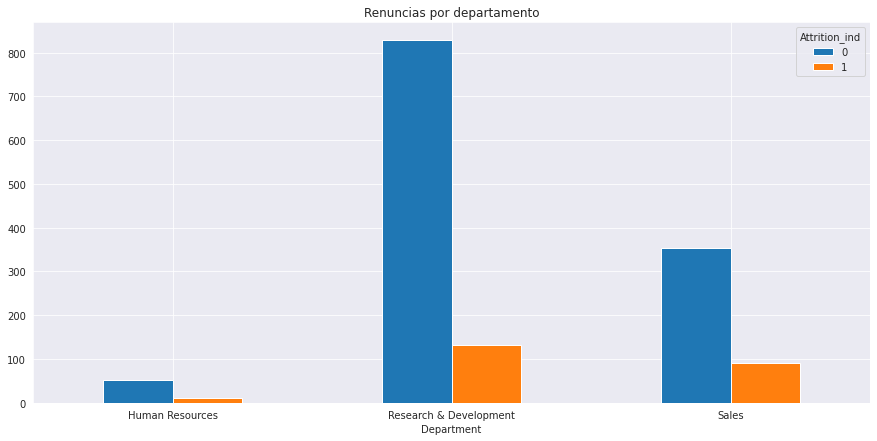

In [31]:
col=pd.crosstab(ibm['Department'],ibm['Attrition_ind'])
col.plot(kind="bar", stacked=False, figsize=(15,7),title='Renuncias por departamento')
plt.xticks(rotation=0)

> ### **Observación**
Estos datos se componen de solo 3 departamentos entre los cuales el departamento de Investigación y Desarrollo tiene las tasas de deserción más altas seguido por el Departamento de Ventas. 

---

## Desglosando por posicion

---

<img src="https://github.com/Alonem-HG/hr-analytics-employee-attrition/blob/master/%5Cdata%5Cpeople.jpg?raw=1">

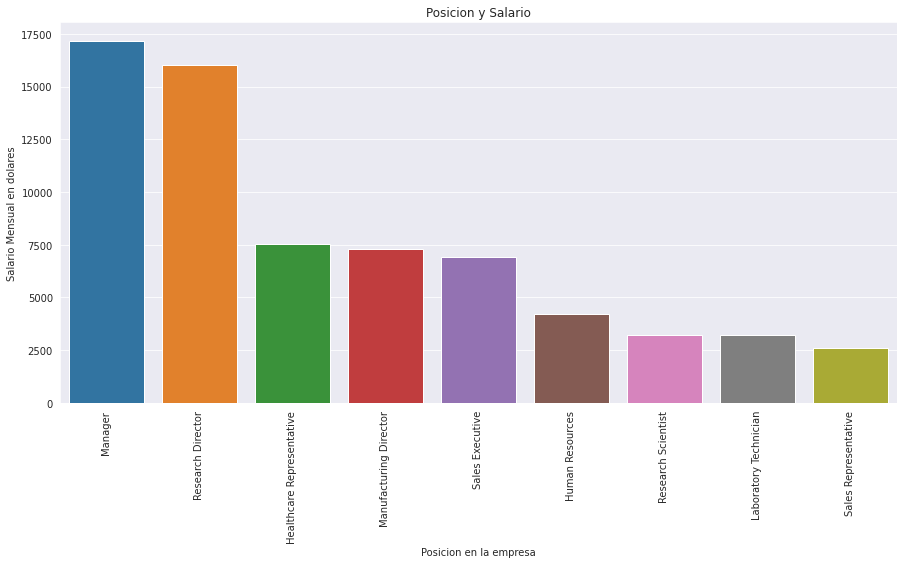

In [32]:
income=pd.DataFrame(ibm.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))

plt.figure(figsize=(15,7))
ax=sns.barplot(x=income.index,y=income.MonthlyIncome)

plt.xticks(rotation=90)
plt.xlabel("Posicion en la empresa")
plt.ylabel("Salario Mensual en dolares")
plt.title("Posicion y Salario")
plt.show()

In [33]:
col=pd.crosstab(ibm['JobRole'],ibm['Attrition_ind'],rownames=['Posiciones'], colnames=['Renuncias'])
ren_by_pos= col[1]
ren_by_pos= ren_by_pos.sort_values(ascending=False)
ren_by_pos

Posiciones
Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: 1, dtype: int64

In [34]:
col.rename(columns = {0:'No',1:'Si'}, inplace = True)
col.sort_values(by=['Si'],ascending=False)

Renuncias,No,Si
Posiciones,,
Laboratory Technician,197,62
Sales Executive,269,57
Research Scientist,245,47
Sales Representative,50,33
Human Resources,40,12
Manufacturing Director,135,10
Healthcare Representative,122,9
Manager,97,5
Research Director,78,2


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

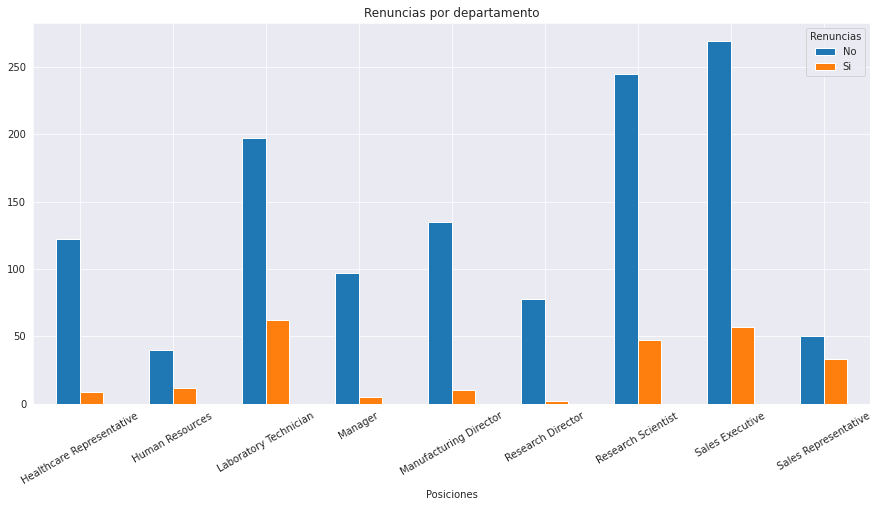

In [35]:
col.plot(kind="bar", stacked=False, figsize=(15,7),title='Renuncias por departamento')
plt.xticks(rotation=30)

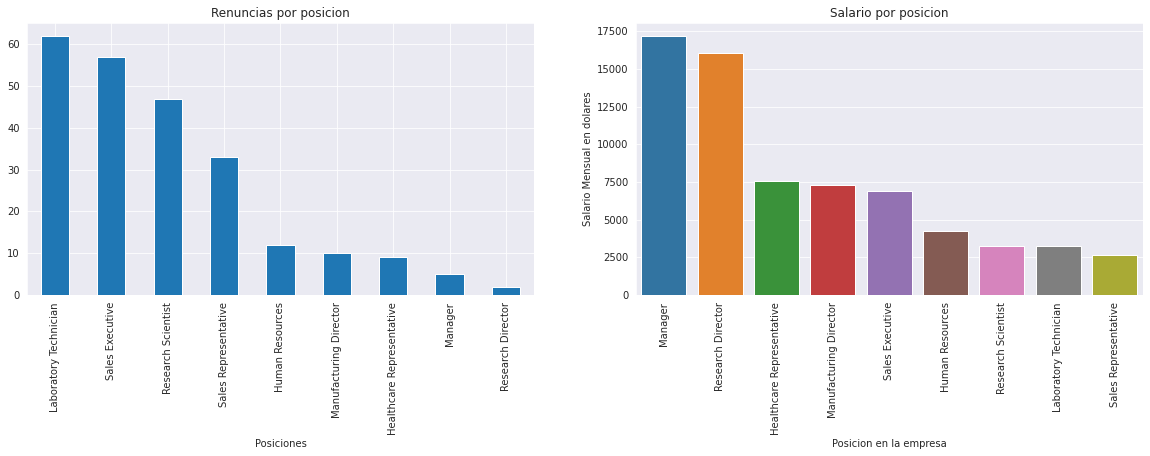

In [36]:
f, axes = plt.subplots(1,2,figsize = (20,5))
ren_by_pos.plot(kind="bar", stacked=True, title='Renuncias por posicion',ax=axes[0])
#plt.xticks(rotation=40)
#ren_by_pos.plot(kind="bar", stacked=True, title='Renuncias por departamento',ax=axes[1])

income=pd.DataFrame(ibm.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))
sns.barplot(x=income.index,y=income.MonthlyIncome,ax=axes[1])
plt.xticks(rotation=90)
plt.xlabel("Posicion en la empresa")
plt.ylabel("Salario Mensual en dolares")
plt.title("Salario por posicion")

attri_by_role= pd.DataFrame(ibm.groupby("JobRole").Attrition_ind.sum())
#plt.figure(figsize=(5,5))
px.pie(ibm, values='Attrition_ind', names='JobRole')

plt.show()
fig.show()

> ### **Observación**
Podemos observar que mientras mas bajo el salario las personas tienden a renunciar y tambien que area de ventas aunque su salario este un poco mas alto que los demas tambien tienden a renunciar posiblemente por la carga de estres que es habitual en esa area.

---

# Analisis por rol y salario

---

<img src="https://github.com/Alonem-HG/hr-analytics-employee-attrition/blob/master/%5Cdata%5Csalary.jpg?raw=1">

In [37]:
jobrole=pd.DataFrame(ibm.groupby("JobRole")["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole"].mean())
jobrole

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,PercentSalaryHike,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole
JobRole,,,,
Healthcare Representative,15.450382,8.374046,14.068702,4.862595
Human Resources,14.807692,5.326923,8.173077,3.134615
Laboratory Technician,15.046332,5.019305,7.656371,3.200772
Manager,15.137255,14.431373,24.549020,6.450980
Manufacturing Director,15.593103,7.600000,12.786207,4.972414
Research Director,14.950000,10.937500,21.400000,6.287500
Research Scientist,15.448630,5.113014,7.715753,3.273973
Sales Executive,14.889571,7.496933,11.101227,4.855828
Sales Representative,15.674699,2.915663,4.674699,2.012048


> #### Distribucion del salario acorde tu experencia reflejada en el nivel de trabajo.

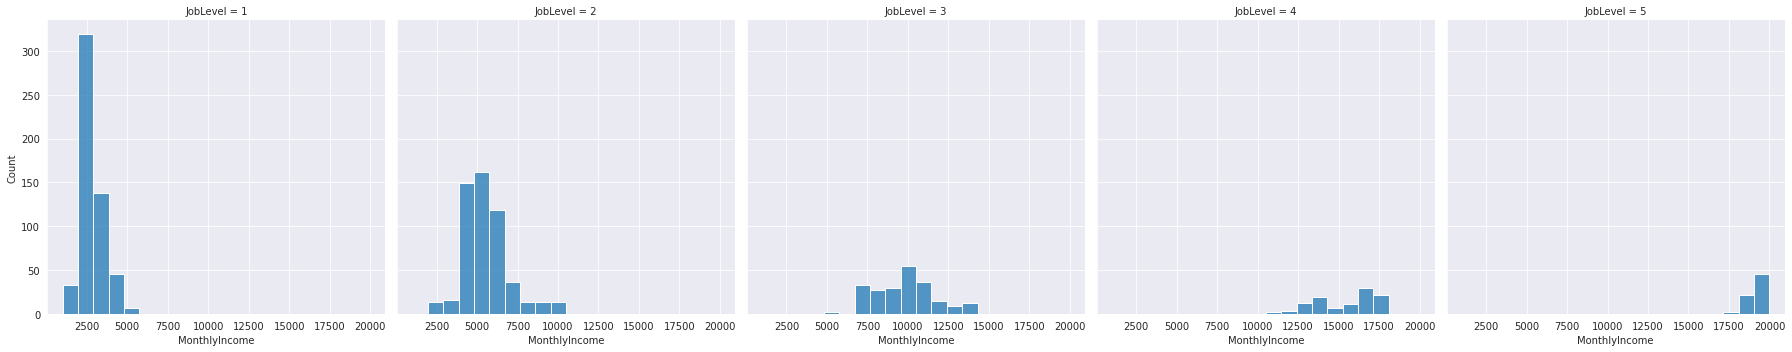

In [38]:
sns.displot(ibm, x="MonthlyIncome", col="JobLevel", multiple="dodge")

         
        Less experienced (low job level) tend to leave the company

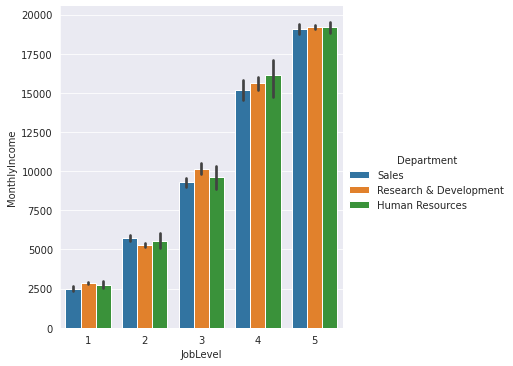

In [39]:
sns.catplot(x="JobLevel", y="MonthlyIncome", hue="Department", data=ibm, kind="bar")

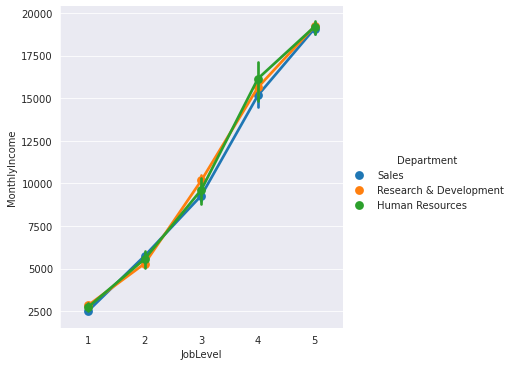

In [40]:
sns.catplot(x="JobLevel", y="MonthlyIncome", hue="Department", data=ibm, kind="point")

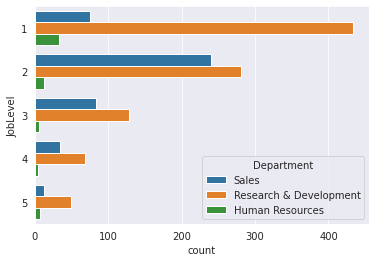

In [41]:
sns.countplot(y="JobLevel", hue="Department", data=ibm)

Text(0.5, 1.0, 'Promedio de empleados segun el nivel por cada departamento')

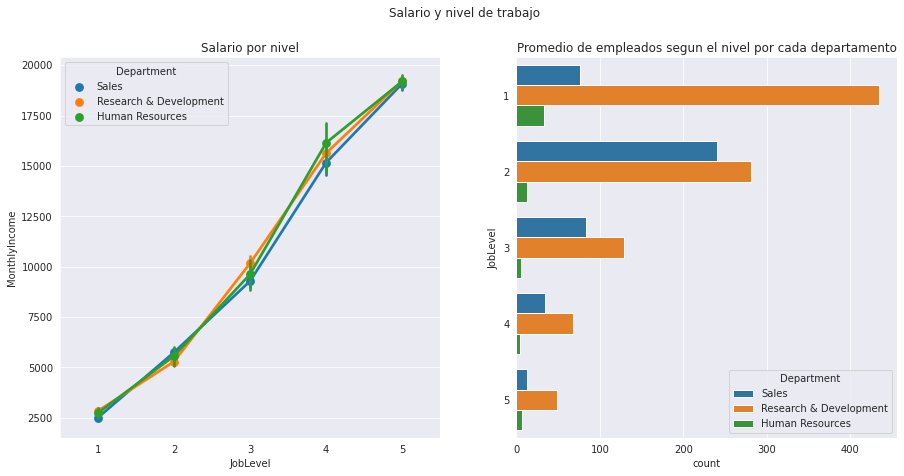

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=False)
fig.suptitle('Salario y nivel de trabajo')

sns.pointplot(ax=axes[0], x="JobLevel", y="MonthlyIncome",hue="Department", data=ibm, kind="point")
axes[0].set_title("Salario por nivel")

sns.countplot(ax=axes[1], y="JobLevel", hue="Department", data=ibm)
axes[1].set_title("Promedio de empleados segun el nivel por cada departamento")

#option 2.
#sns.barplot(ax=axes[2], x="JobLevel", y="MonthlyIncome", hue="Department", data=ibm)
#axes[2].set_title("treis")

> ### **Observaciónes**
* El salario aumenta acorde al nivel de trabajo 
* El departamento que tiene mayor crecimiento es R&D y Sales.
* El departanmento de R&D y HR tienen mayor creciemiento en su nivel de trabajo.

## Observando las tendencia de desercion en distancia y años trabajados.

<img src="https://github.com/Alonem-HG/hr-analytics-employee-attrition/blob/master/%5Cdata%5Cpeople2.jpg?raw=1">

In [43]:
att_by_dist=ibm.groupby(['DistanceFromHome','Attrition_ind']).apply(lambda x:x['DistanceFromHome'].count()).reset_index(name='Counts')
#att_by_dist

In [44]:
fig=px.line(att_by_dist,x='DistanceFromHome',y='Counts',color='Attrition_ind',
            labels={
                     "DistanceFromHome": "Distancia en Millas",
                     "Counts": "N° de empleados",
                     "Attrition_ind": "Renuncias"
                 },
            title='Relacion de la distancia con renuncias')
fig.show()

> ### **Observación**
* En la milla 9 y 24 hay la mayor tasa de desercion(18 y 12 empleados). Lo cual parece no significar en la desicion de renunciar.

In [45]:
att_by_twy=ibm.groupby(['TotalWorkingYears','Attrition_ind']).apply(lambda x:x['TotalWorkingYears'].count()).reset_index(name='Counts')
att_by_twy

,TotalWorkingYears,Attrition_ind,Counts
0,0.0,0,6
1,0.0,1,5
2,1.0,0,41
3,1.0,1,40
4,2.0,0,22
...,...,...,...
66,35.0,0,3
67,36.0,0,6
68,37.0,0,4
69,38.0,0,1


In [46]:
fig=px.line(att_by_twy,x='TotalWorkingYears',y='Counts',color='Attrition_ind',
            labels={
                     "TotalWorkingYears": "Años trabajados",
                     "Counts": "N° de empleados",
                     "Attrition_ind": "Renuncias"
                 },
            title='Años trabajados por persona')
fig.show()

> ### **Observación**
* Se observa en la grafica que en el año 1, 6 y 10 la tasa es alta de renuncias y podria tomarse en cuenta para realizar una evaluacion para que el empleado no decida renunciar. 

--- 

# Modelado

---

> ### Identificando Outliers

In [47]:
#buscando outliers en salario mensual
#numeric_hr = ibm.select_dtypes(include=[np.number])

out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)

Winsorization_outliers(ibm['MonthlyIncome'])

print("Datos: ",ibm['MonthlyIncome'].shape[0], " total de outliers: ",len(out))

Outliers: [1232.0, 19926.0, 1102.0, 19999.0, 1200.0, 1009.0, 1281.0, 19859.0, 1051.0, 19973.0, 19845.0, 1052.0, 19627.0, 19943.0, 19740.0, 1223.0, 1118.0, 19847.0, 19717.0, 19701.0, 1359.0, 1261.0, 1274.0, 19658.0, 19833.0, 19665.0, 1081.0, 1091.0, 19636.0, 1129.0]
Datos:  1470  total de outliers:  30


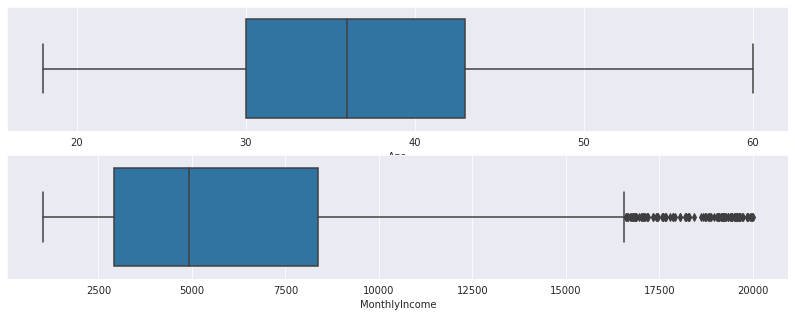

In [48]:
f, axes = plt.subplots(2,figsize = (14,5))
sns.boxplot(x='Age',  data=ibm ,ax=axes[0])
sns.boxplot(x='MonthlyIncome',  data=ibm ,ax=axes[1])

#f, axes = plt.subplots(2, figsize = (14,10))
#sns.boxplot(x='',y='',hue='categorica',  data=df, ax=axes[0])


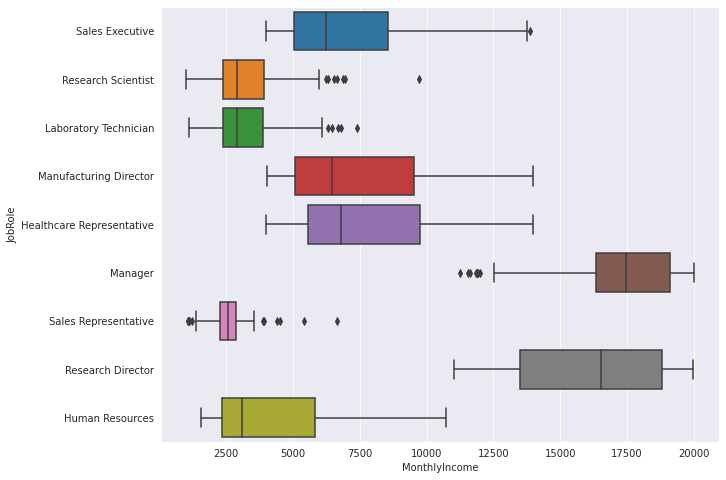

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=ibm)

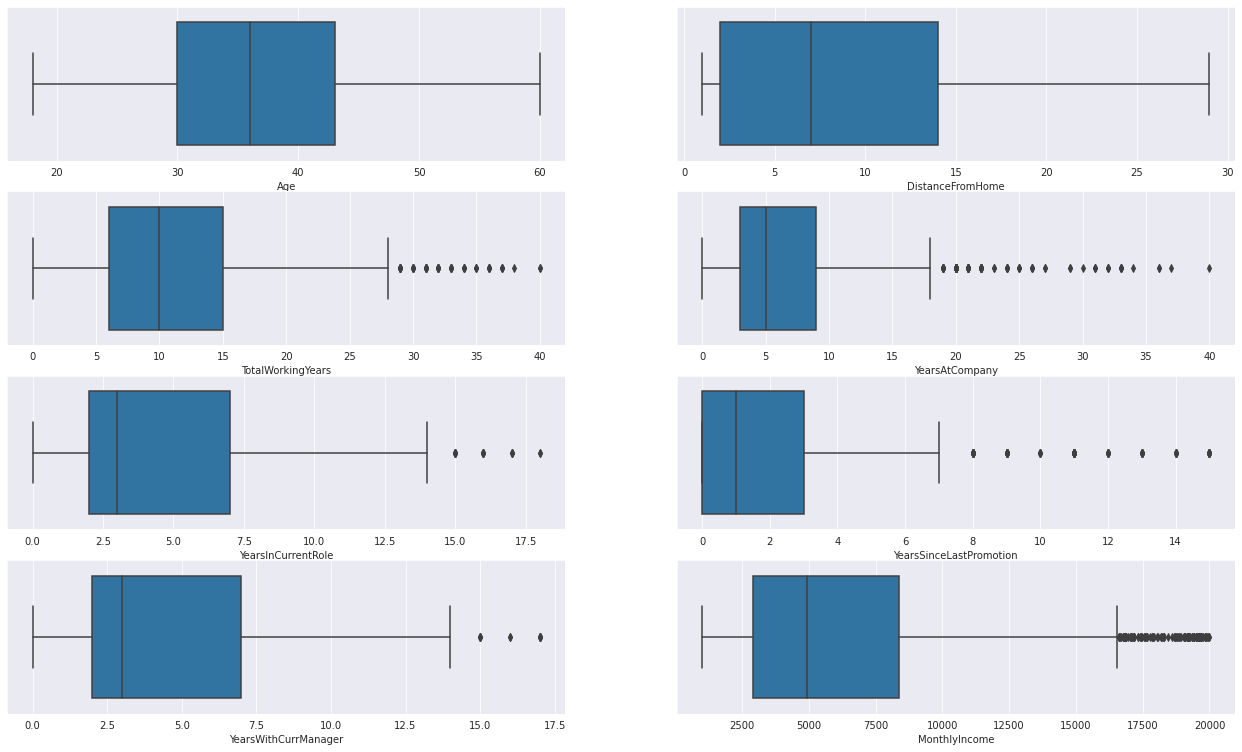

In [50]:
f, axes = plt.subplots(4,2,figsize = (22,13))
sns.boxplot(ax=axes[0, 0], data=ibm, x='Age')
sns.boxplot(ax=axes[0, 1], data=ibm, x='DistanceFromHome')
sns.boxplot(ax=axes[1, 0], data=ibm, x='TotalWorkingYears')
sns.boxplot(ax=axes[1, 1], data=ibm, x='YearsAtCompany')
sns.boxplot(ax=axes[2, 0], data=ibm, x='YearsInCurrentRole')
sns.boxplot(ax=axes[2, 1], data=ibm, x='YearsSinceLastPromotion')
sns.boxplot(ax=axes[3, 0], data=ibm, x='YearsWithCurrManager')
sns.boxplot(ax=axes[3, 1], data=ibm, x='MonthlyIncome')
# no usar en categoricas

> ### **Conclusion de outliers**
Ya que nuestra variable principal es de clasificacion no necesitamos quitar outliers.

---

# Correlacion

***

## Matriz de correlacion.

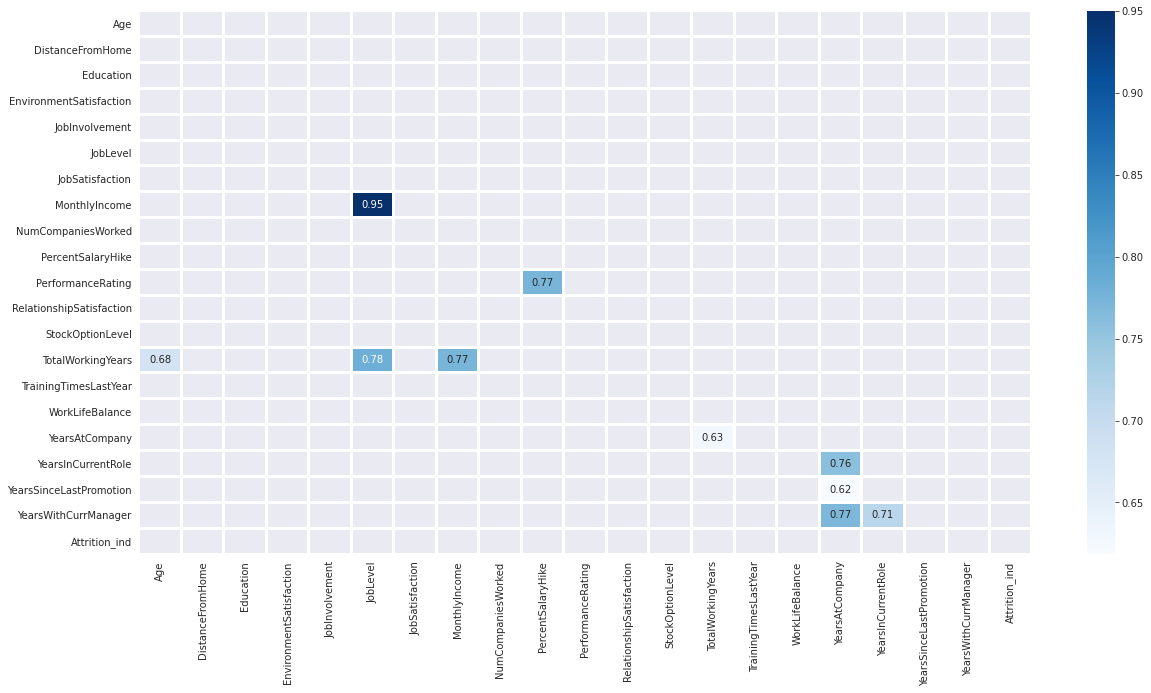

In [51]:
# Subset todos los datos numericos del dataset
#ibm = ibm.select_dtypes(include=[np.number])
dfCorr = ibm.corr()
filteredDf = dfCorr[((dfCorr >= .6) | (dfCorr <= -.6)) & (dfCorr !=1.000)]
plt.figure(figsize=(20,10))

# Generate a mask for the upper triangle
mask = np.zeros_like(filteredDf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(filteredDf,mask=mask, annot=True, cmap="Blues",linewidths=2.0)
plt.show()


### Crear un listado de todas las correlaciones

In [52]:
corelation=ibm.corr()
corr_pairs = corelation.unstack()
print(corr_pairs)

Age            Age                        1.000000
               DistanceFromHome          -0.001686
               Education                  0.208034
               EnvironmentSatisfaction    0.010146
               JobInvolvement             0.029820
                                            ...   
Attrition_ind  YearsAtCompany            -0.134392
               YearsInCurrentRole        -0.160545
               YearsSinceLastPromotion   -0.033019
               YearsWithCurrManager      -0.156199
               Attrition_ind              1.000000
Length: 441, dtype: float64


### Ordenar los valores de correlaciones

In [53]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Attrition_ind       TotalWorkingYears    -0.171063
TotalWorkingYears   Attrition_ind        -0.171063
JobLevel            Attrition_ind        -0.169105
Attrition_ind       JobLevel             -0.169105
                    YearsInCurrentRole   -0.160545
                                            ...   
WorkLifeBalance     WorkLifeBalance       1.000000
YearsAtCompany      YearsAtCompany        1.000000
YearsInCurrentRole  YearsInCurrentRole    1.000000
PercentSalaryHike   PercentSalaryHike     1.000000
Attrition_ind       Attrition_ind         1.000000
Length: 441, dtype: float64


### Seleccionar las correlaciones más fuertes (Mayores a 60%)

In [54]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.6]
print(strong_pairs[[0,2,4,6,8,10,12,14,16,18]])

YearsSinceLastPromotion  YearsAtCompany          0.618409
YearsAtCompany           TotalWorkingYears       0.628133
TotalWorkingYears        Age                     0.680381
YearsInCurrentRole       YearsWithCurrManager    0.714365
YearsAtCompany           YearsInCurrentRole      0.758754
                         YearsWithCurrManager    0.769212
MonthlyIncome            TotalWorkingYears       0.772893
PercentSalaryHike        PerformanceRating       0.773550
TotalWorkingYears        JobLevel                0.782208
JobLevel                 MonthlyIncome           0.950300
dtype: float64


In [55]:
ibm.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


> ### **Correlaciones para regresion y clasificacion**
Estamos definiendo un modelo que permita realizar una clasifacion por lo cual tambien encontramos una buena correlacion tambien para posibles regresiones en un futuro.

-------
# Machine Learning
-------

<img src=![quitjob.jpg](attachment:ebea21aa-6aa6-468a-995c-7fb3c4a1e574.jpg)>

> ### Variables categorias a numeros.

---

    Pasar variables a numeros para realizar un modelo de clasificacion

---

In [56]:
for x in range(0,len(cat_cols)):
    
    ibm[cat_cols[x]]=ibm[cat_cols[x]].astype("category")
    ibm[cat_cols[x]]=ibm[cat_cols[x]].cat.codes
   # print (ibm[cat_cols[x]].value_counts())

In [57]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   BusinessTravel            1470 non-null   int8   
 2   Department                1470 non-null   int8   
 3   DistanceFromHome          1470 non-null   float64
 4   Education                 1470 non-null   int8   
 5   EducationField            1470 non-null   int8   
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   Gender                    1470 non-null   int8   
 8   JobInvolvement            1470 non-null   int8   
 9   JobLevel                  1470 non-null   int8   
 10  JobRole                   1470 non-null   int8   
 11  JobSatisfaction           1470 non-null   int8   
 12  MaritalStatus             1470 non-null   int8   
 13  MonthlyIncome             1470 non-null   float64
 14  NumCompa

## Para conocer el nombre de la variable categorica se creo un documento en word. 

        data/values_category_hr.docx

In [58]:
#Variables de entrenamiento y prueba
X= ibm.loc[:,ibm.columns!='Attrition_ind']
#Variable principal
y=ibm.loc[:, "Attrition_ind"]

In [59]:
#X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25)

# Modelos de clasificacion

In [60]:
#copy
#PCA
#object
import sklearn.metrics as metrics
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(use_label_encoder =False,eval_metric='mlogloss'))]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier())]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

clfs.append(("NeuronalNetwork",
             Pipeline([("Scaler", StandardScaler()),
                       ("NeuronalNetwork", MLPClassifier(hidden_layer_sizes=(10,4),
                                                         max_iter=10000,
                                                         activation ='logistic',
                                                         tol= 1e-8))])))

clfs.append(("SupportVectorClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("SupportVectorClassifier", SVC())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 5

results, names  = [], [] 
#Validacion cruzada y matriz de confusion
for name, model  in clfs:
    kfold = KFold(n_splits=n_folds)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("Matriz de confusion")
    print(cnf_matrix)
    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),cv_results.std())
    print(msg,'\n')

    

Matriz de confusion
[[303  10]
 [ 39  16]]
LogReg: 0.858437 (+/- 0.028349) 

Matriz de confusion
[[309   4]
 [ 38  17]]
XGBClassifier: 0.864809 (+/- 0.025766) 

Matriz de confusion
[[311   2]
 [ 49   6]]
KNN: 0.844825 (+/- 0.034193) 

Matriz de confusion
[[273  40]
 [ 34  21]]
DecisionTreeClassifier: 0.771308 (+/- 0.016616) 

Matriz de confusion
[[311   2]
 [ 45  10]]
RandomForestClassifier: 0.847536 (+/- 0.031219) 

Matriz de confusion
[[309   4]
 [ 39  16]]
GradientBoostingClassifier: 0.862974 (+/- 0.028055) 

Matriz de confusion
[[311   2]
 [ 47   8]]
RidgeClassifier: 0.859329 (+/- 0.035958) 

Matriz de confusion
[[307   6]
 [ 41  14]]
BaggingRidgeClassifier: 0.840284 (+/- 0.020036) 

Matriz de confusion
[[310   3]
 [ 43  12]]
ExtraTreesClassifier: 0.851176 (+/- 0.027483) 

Matriz de confusion
[[293  20]
 [ 33  22]]
NeuronalNetwork: 0.831238 (+/- 0.018938) 

Matriz de confusion
[[311   2]
 [ 43  12]]
SupportVectorClassifier: 0.852077 (+/- 0.032365) 



> ### Tomamos los 2 mejores modelos para mejorarlos.  
> He creado una libreria llamada **grid_params** donde busca los mejores parametros con **gridsearchcv, validacion cruzada y normalizar datos.**

In [61]:
import grid_params as gp

In [62]:
gp.lr_enhance(X_train, y_train, X_test, y_test)

Accuracy:  0.875
Data Normalization:  StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=30000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

Best parameters: {'logistic_Reg__C': 1.623776739188721, 'logistic_Reg__max_iter': 30000, 'logistic_Reg__penalty': 'l2', 'pca__n_components': 22, 'std_slc': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [63]:
gp.xgbc_enhance(X_train, y_train, X_test, y_test)

Accuracy:  0.8858695652173914
Data Normalization:  MaxAbsScaler(copy=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='mlogloss',
              gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

Best parameters: {'std_slc': MaxAbsScaler(copy=True), 'xgbc__colsample_bytree': 0.6, 'xgbc__eval_metric': 'mlogloss', 'xgbc__gamma': 0.1, 'xgbc__learning_rate': 0.05, 'xgbc__max_depth': 8, 'xgbc__min_child_weight': 7, 'xgbc__n_estimators': 500, 'xgbc__subsample': 0.6}


In [64]:
gp.knn_enhance(X_train, y_train, X_test, y_test)

Accuracy:  0.8695652173913043
Data Normalization:  MinMaxScaler(copy=True, feature_range=(0, 1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')



{'knn__algorithm': 'auto',
 'knn__metric': 'manhattan',
 'knn__n_neighbors': 8,
 'knn__weights': 'distance',
 'ss': MinMaxScaler(copy=True, feature_range=(0, 1))}

In [65]:
gp.svc_enhance(X_train, y_train, X_test, y_test)

Accuracy:  0.8804347826086957
Data Normalization:  StandardScaler(copy=True, with_mean=True, with_std=True)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Best parameters: {'ss': StandardScaler(copy=True, with_mean=True, with_std=True), 'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


---

## Una vez que tenemos los mejores parametros realizamos su entrenamiento, matriz de confusion y curva roc.

---

LogReg


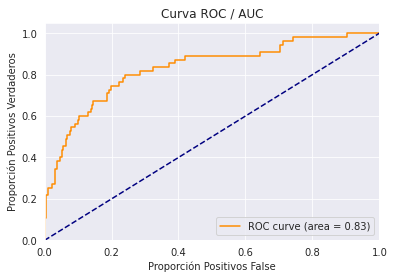

 
LogReg

--Metrics--
Precision: 0.6153846153846154
Exactitud: 0.8668478260869565
Recall (aka Sensitivity): 0.2909090909090909
Specificity: 0.9680511182108626
LogReg: 0.858437 (+/- 0.028349) 

XGBClassifier


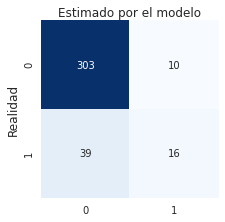

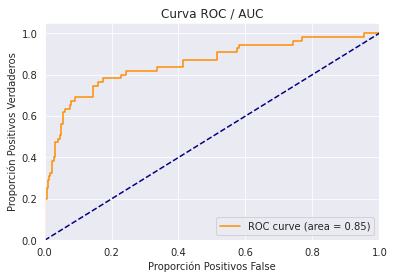

 
XGBClassifier

--Metrics--
Precision: 0.7241379310344828
Exactitud: 0.8858695652173914
Recall (aka Sensitivity): 0.38181818181818183
Specificity: 0.9744408945686901
XGBClassifier: 0.872053 (+/- 0.022809) 



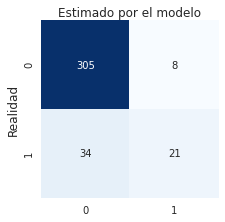

In [69]:
import sklearn.metrics as metrics
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                                                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                                                    max_iter=30000, multi_class='auto', n_jobs=None,
                                                    penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                                                    verbose=0, warm_start=False))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", MaxAbsScaler()),
                       ("XGB", XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                              colsample_bynode=1, colsample_bytree=0.6, eval_metric='mlogloss',
                                              gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=8,
                                              min_child_weight=7, missing=None, n_estimators=500, n_jobs=1,
                                              nthread=None, objective='binary:logistic', random_state=0,
                                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                              silent=None, subsample=0.6, verbosity=1))]))) 


#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 5

results, names  = [], [] 
#Validacion cruzada y matriz de confusion
for name, model  in clfs:
    kfold = KFold(n_splits=n_folds)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)
    model.fit(X_train, y_train)

    #curva roc
    print(name)
    y_pred_proba = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Proporción Positivos False')
    plt.ylabel('Proporción Positivos Verdaderos')
    plt.title('Curva ROC / AUC')
    plt.legend(loc="lower right")
    plt.show()
    print(' ')

    y_pred = model.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(name)
    ## Matriz de confusion grafica
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots(figsize=(3, 3))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 10})
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.ylabel('Realidad', fontsize=12, y=0.5)
    plt.xlabel('Estimado por el modelo', fontsize=12);
    #print("Matriz de confusion")
    #print(cnf_matrix)
    print('')
    tn, fp, fn, tp = cnf_matrix.ravel()
    print('--Metrics--')
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
    print("Recall (aka Sensitivity):",metrics.recall_score(y_test, y_pred))
    print("Specificity:", tn / (tn + fp))
    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),cv_results.std())
    print(msg,'\n')

    

> # **Recomendaciones:**
* Se puede observar en EDA que los primeros años son cruciales para la desicion si un empleado renuncia o se queda. Por eso requiere especial atencion a que el empleado reciba una rapida capacitacion y crecimiento dentro de la empresa ya que tambien abarcaria incremento en su salario lo cual tambien ayudaria a decidir que se quede.
* Tambien seria buena opcion obtener mas informacion en estas posiciones Laboratory Technician con 62, Sales Executive con 57 y Research Scientist con 47 ya que es donde se presentaron mas indice de renuncias.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [ ]:
/content/gdrive/MyDrive/Colab Notebooks/grid_params.py